In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 기본적인 전처리 진행

In [ ]:
daum_news = pd.read_csv('news_with_summary.csv', index_col=0)
daum_news.drop('Unnamed: 0', axis=1, inplace=True)
daum_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5337 entries, 0 to 5336
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5337 non-null   int64 
 1   title    5337 non-null   object
 2   url      5337 non-null   object
 3   press    5337 non-null   object
 4   text     5337 non-null   object
 5   summary  5312 non-null   object
dtypes: int64(1), object(5)
memory usage: 291.9+ KB


In [ ]:
daum_news.isnull().sum()

date        0
title       0
url         0
press       0
text        0
summary    25
dtype: int64

In [ ]:
daum_news[daum_news['summary'].isnull()]

,date,title,url,press,text,summary
26,20240215,"[포토] 저화질 영상을 8K로…삼성, 유럽서 신기술 소개",https://v.daum.net/v/20240221202403588,매일경제 · 20:24,[''],NaN
79,20240215,"[포토] SKT, 美 GPU 회사 람다에 투자",https://v.daum.net/v/20240221175412312,매일경제 · 17:54,[''],NaN
161,20240215,5G 스마트폰 평균가격 140만원 육박,https://v.daum.net/v/20240221164218851,일간스포츠 · 16:42,"['', '', '']",NaN
975,20240215,KT 주가 무슨 일? 10년 만 신기록 이어 '업계 1위' 넘본다,https://v.daum.net/v/20240221070017695,일간스포츠 · 07:00,"['', '']",NaN
1051,20240215,[포토] 바르셀로나에 뜬 '갤S24' 옥외광고,https://v.daum.net/v/20240220191201239,매일경제 · 19:12,[''],NaN
1137,20240215,"카카오, M&A·IPO 때 투자자 보호 방안부터 마련한다",https://v.daum.net/v/20240220173420543,일간스포츠 · 17:34,[''],NaN
1175,20240215,"SKT-NTT도코모, '5G·6G 핵심' 가상화 기지국 기술 백서 발간",https://v.daum.net/v/20240220165818930,일간스포츠 · 16:58,[''],NaN
1558,20240215,"지그재그, 입점 스토어 광고비 지급 프로모션",https://v.daum.net/v/20240220115223731,일간스포츠 · 11:52,[''],NaN
1975,20240215,정부의 가격 인하 타깃 통신비서 OTT로,https://v.daum.net/v/20240220070016901,일간스포츠 · 07:00,[''],NaN
1976,20240215,"갤럭시S24, 국내외서 '충전 이상' 잇따라…삼성 ""업데이트로 해결""",https://v.daum.net/v/20240220070008875,일간스포츠 · 07:00,"['', '', '']",NaN


In [ ]:
daum_news.dropna(inplace=True)

## xa0 코드 전처리

In [ ]:
daum_news['summary'] = daum_news['summary'].str.replace('xa0','')

daum_news['summary'].head(10)

0    행사는진흥원과 장비 구축기업 13곳이참여해▲5G기반 첨단 제조로봇 실증 서비스 분야...
1    21일뉴스 업계에 따르면 저커버그 CEO는 아시아·태평양 순회 방문의 하나로 내주 ...
2    인공지능(AI) 표절검사 서비스 카피킬러 운영사 무하유는 신임 최고개발책임자(CTO...
3    청소가전 전문기업 로보락은지난해 국내 매출액이 전년 대비 2배성장한2천억 원을 기록...
4    복수의결권주식이란 1주당 최대 10개의 의결권을 부여하는 주식으로 벤처기업이 지분 ...
5    (지디넷코리아=신영빈 기자)국내 서빙로봇 선두기업 브이디컴퍼니가 외식업 프랜차이즈 ...
6    (지디넷코리아=방은주 기자)서울대학교 AI연구원(원장 장병탁)과 유럽 최대 인공지능...
7    KBS 청주 앵커 하루가 다르게 급변하는 디지털 기술이 어렵고 불편한 어르신들을 돕...
8    epa11169746 A man tries to access social media...
9    epa11169745 A man reads news of social media p...
Name: summary, dtype: object

## 정규표현식으로 추가 전처리

In [ ]:
# 영어만 있는 기사 제거
import re

p = re.compile('[^가-힣]*')
indices = []

for idx, row in daum_news.iterrows():
    m = p.findall(row['summary'])
    if len(m) == 2:
        indices.append(idx)
        print(m)


print('이전 행 개수: ', len(daum_news))
daum_news.drop(indices, axis=0, inplace=True)
print('이후 행 개수: ', len(daum_news))

['epa11169746 A man tries to access social media platform X (formerly Twitter) on a mobile phone n Peshawar Pakistan 21 February 2024. Pakistani authorities have restricted access to the social media platform X following widespread allegations of electoral fraud in the c', '']
['epa11169745 A man reads news of social media platform X (formerly Twitter) blockade on a computer in Peshawar Pakistan 21 February 2024. ', '']
['epa11169742 A man reads news of social media platform X (formerly Twitter) blockade on a computer in Peshawar Pakistan 21 February 2024. ', '']
['epa11169743 A man reads news of social media platform X (formerly Twitter) blockade on a computer in Peshawar Pakistan 21 February 2024. ', '']
['epa11169744 A man reads news of social media platform X (formerly Twitter) blockade on a computer in Peshawar Pakistan 21 February 2024. Pakistani authorities have restricted access to the social media platform X following widespread allegations of electoral fraud in', '']
['Cuso o

In [ ]:
# 기자 이름 전처리
p = re.compile('[([]*[\w=가-힣\s]*기자[\s=]*[)]]*')
for i in daum_news['summary']:
    m = p.findall(i)
    if len(m) != 0:
        print(m)
        print(i)

daum_news['summary'] = daum_news['summary'].str.replace(r'[([]*[\w=가-힣\s]*기자[\s=]*[)]]*','')

['(지디넷코리아=신영빈 기자)']
(지디넷코리아=신영빈 기자)국내 서빙로봇 선두기업 브이디컴퍼니가 외식업 프랜차이즈 기업 도야에프앤비의 가맹점 디지털전환(DX)에 나선다. 매장 자동화 솔루션을 공급해 직원들의 업무 강도는 낮추고 대면 서비스의 질을 개선해 매장 운영 시스템 효율을 극대화한다는 계획이다. 
['(지디넷코리아=방은주 기자)']
(지디넷코리아=방은주 기자)서울대학교 AI연구원(원장 장병탁)과 유럽 최대 인공지능 연구컨소시엄 사이버밸리(Cyber Vally) 서울시 산하 서울AI허브는 3자간 업무협약(MOU)을 맺고 글로벌 AI 공동연구 협력을 추진한다고 21일 밝혔다. 구체적으로는 3자는 ▲유럽 시장진출 지원 ▲유럽 투자 네트워크를 통한 현지 투자연계 ▲인공지능 연구 프로젝트 참여기회 제공 ▲상호 커뮤니티 자원 및 공간지원 교류 ▲사이버밸리 배치 프로그램 참여기회 제공 등에 힘을 합친다. 
['(지디넷코리아=김성현 기자)']
(지디넷코리아=김성현 기자)한국정보통신진흥협회(KAIT)가 제141회 이사회 제38회 정기총회를 개최하고 조직 개편을 단행했다고 21일 밝혔다. 인공지능(AI)을 중심으로 한 디지털 패러다임 전환기에 신산업 분야 진흥 육성을 추진하는 과정에서 협회 기능과 역할을 강화하고자 목적사업 범위 확대는 물론 회원체계 개편을 위한 관련 규정 개정 안건도 함께 처리했다. 그간 협회는 클라우드 보안인증 평가기관 지정 공공마이데이터 이용지원기관 승인 등 선도 사업 수행을 위한 기반을 확보했고 중소기업 대상 클라우드서비스 활용지원 사업과 초거대 AI 활용지원 사업 등을 수행하며 디지털 신산업 진흥의 핵심 지원기관으로 성장하기 위한 다양한 정책사업 수행 경험을
['(지디넷코리아=김성현 기자)']
(지디넷코리아=김성현 기자)과학기술정보통신부 우정사업본부가 국민연금공단과 노후 준비 지원을 위한 업무협약을 체결했다고 21일 밝혔다. 이번 협약은 우체국보험과 국민연금공단 노후준비서비스 사업을 연계해 국민의 안정된 노후생활 지원 고령화에 따른 사회적 비용

/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/4167787693.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'[([]*[\w=가-힣\s]*기자[\s=]*[)]]*','')


In [ ]:
# 기자 이름 전처리(2)
p = re.compile('[\w\s=]{3,8}[가-힣]{1,3}\s*기자[\s=]*')
indices = []

for idx, row in daum_news.iterrows():
    m = p.findall(row['summary'])
    if len(m) > 2:
        print(m)
        print(row['summary'])
        indices.append(idx)

print('이전 행 개수: ', len(daum_news))
daum_news.drop(indices, axis=0, inplace=True)
print('이후 행 개수: ', len(daum_news))

['김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ', 'm 김명근 스포츠동아 기자 ']
김명근 스포츠동아 기자 dionys@donga.comdonga.com 김명근 스포츠동아 기자 dionys@donga.comdonga.com 김명근 스포츠동아 기자 dionys@donga.com 김명근 스포츠동아 기자 dionys@donga.com 김명근 스포츠동아 기자 dionys@donga.com 김명근 스포츠동아 기자 dionys@dionys@donga.com 김명근 스포츠동아 기자 dionys@dionys@donga.com 김명근 스포츠동아 기자 dionys@dionys@donga.com 김명근 스포츠동아 기자 dionys@donga
['  스포츠한국 임현지 기자 ', '  스포츠한국 임현지 기자 ', '  스포츠한국 임현지 기자 ']
- 고건석 씨 별세 - 고정관 조아제약 기획홍보실 실장 부친상 - 19일 - 신촌 세브란스병원 장례식장 12호실 - 발인 2월21일 수요일 오후 3시 - 장지 서현추모공원 - 연락처 02-2227-7500  스포츠한국 임현지 기자 limhj@hankooki.com  스포츠한국 임현지 기자 limhj@hankooki.com@hankooki.com   스포츠한국 임현지 기자 limhj@hankooki.com @hankooki.com  
['스 CEO 16일 기자', '다 미디어오늘 박재령 기자 ', '스 CEO 16일 기자', '다 미디어오늘 박재령 기자 ']
17일 한남동 관저에서 윤석열 대통령 배우 이정재 오찬 테드 서랜도스 CEO 16일 기자실에선 가격 변동 계획 없다 미디어오늘 박재령 기자 17일 한남동 관저에서 윤석열 대통령 배우 이정재 오찬 테드 서랜도스 CEO 16일 기자실에선 가격 변동 계획 없다 미디어오늘 박재령

In [ ]:
# 기자 이름 전처리 (3) - 앵커
daum_news['summary'] = daum_news['summary'].str.replace(r'^앵커','')

p = re.compile('KBS [가-힣\s]*앵커')
for i in daum_news['summary']:
    m = p.findall(i)
    if len(m) != 0:
        print(m)
        print(i)

daum_news['summary'] = daum_news['summary'].str.replace(r'KBS [가-힣\s]*앵커','')

['KBS 청주 앵커']
KBS 청주 앵커 하루가 다르게 급변하는 디지털 기술이 어렵고 불편한 어르신들을 돕는 이색 공간이 마련됐습니다. 무인 단말기 이른바 키오스크 주문법을 익히고 첨단 기술로 건강도 관리하는 사랑방인데요. 이만영 기자가 보도합니다. 화면에서 안내하는 대로 한 단계 한 단계 주문해 나갑니다. 
['KBS 춘천앵커']
KBS 춘천앵커 휴전선 아래 철원평야는 우리나라의 대표적인 철새 도래집니다. 지역 주민들은 해마다 철새들에게 굶주리지 말라고 먹이를 챙겨주곤 했는데요 최근 몇 년 사이 가축 전염병 때문에 먹이 주기가 쉽지 않게 되자 해법으로 드론이 등장했습니다. 
['KBS 광주 앵커']
KBS 광주 앵커 지난해 5월 누리호 3차 발사 성공에 이어 2027년까지 네차례 추가 발사가 예정돼 있는데요. 누리호 제작사인 한화에어로스페이스가 우주발사체의 123단을 제작해 조립하고 발사 전에 기능을 점검하는 제작센터를 순천에 건립합니다. 보도에 이성각 기자입니다. 
['KBS 광주 앵커']
KBS 광주 앵커 지난해 5월 누리호 3차 발사 성공에 이어 2027년까지 네차례 추가 발사가 예정돼 있는데요. 제작센터는 우주발사체의 123단을 제작해 조립하고 발사 전에 기능을 점검하는 제작센터를 순천에 건립합니다. 
['KBS 광주 앵커']
KBS 광주 앵커 지난해 5월 누리호 3차 발사 성공에 이어 2027년까지 네차례 추가 발사가 예정돼 있는데요. 누리호 제작사인 한화에어로스페이스가 우주발사체의 123단을 제작해 조립하고 발사 전에 기능을 점검하는 제작센터를 순천에 건립합니다. 
['KBS 춘천 앵커']
KBS 춘천 앵커 휴전선 아래 강원도 철원평야는 우리나라의 대표적인 철새 도래집니다. 지역 주민들은 해마다 철새들에게 굶주리지 말라고 먹이를 챙겨주곤 했는데요 최근 몇 년 사이 가축 전염병 때문에 먹이주기가 쉽지 않게 되자 해법으로 드론이 등장했습니다. 
['KBS 춘천 앵커']
KBS 춘천 앵커 휴전선 아래 강원도 철원평야는 우리나라의 대표적인 철새 도래집니

/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/3618692220.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'^앵커','')
/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/3618692220.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'KBS [가-힣\s]*앵커','')


In [ ]:
# 기자 이름 전처리 (4)
p = re.compile('^\w{,6}[\s=]?[가-힣]{3}\s?기자[\s=]{,2}')
for i in daum_news['summary']:
    m = p.findall(i)
    if len(m) != 0:
        print(m)
        print(i)

daum_news['summary'] = daum_news['summary'].str.replace(r'^\w{,6}[\s=]?[가-힣]{3}\s?기자[\s=]{,2}','')

['헤럴드경제=구본혁 기자 ']
헤럴드경제=구본혁 기자 한국원자력연구원은 ‘원자력 바로알기의 날’ 프로그램을 개편해 연구원을 연중 내내 개방한다고 21일 밝혔다. 프로그램은 연구개발 현장에 청소년과 학생 가족을 초대해 원자력에 대한 이해를 돕고 올바른 지식을 제공하기 위한 취지로 기획됐다. 학생과 청소년들에게는 미래에 과학자가 되는 모습을 상상하며 연구 현장을 체험하는 기회가 될 예정이다. 
['이데일리 한광범 기자 ']
이데일리 한광범 기자 인공지능(AI) 기술을 활용한 딥페이크 영상이 오는 4월 국회의원 총선거에서 영향을 끼칠 수 있다는 우려가 제기되고 있는 가운데 국내 최대 포털인 네이버가 딥페이크 영상에 주의 문구를 노출한다. 앞서 오픈AI와 구글 등 20개 빅테크 기업도 지난 16일(현지시간) 독일 뮌헨안보회의(MSC)에서AI 생성 콘텐츠를 방지하는 데 노력하기로 합의했다. 
['이데일리 김가은 기자 ']
이데일리 김가은 기자 한국소비자원은 넥슨 온라인 게임 ‘메이플스토리’ 확률형 아이템 조작과 관련해 피해를 입은 소비자들을 모아 집단분쟁조정 절차에 들어간다고 21일 밝혔다. 신청 대상은 지난 2021년 3월 4일까지 큐브 2종(레드큐브 블랙큐브)을 구매한 소비자다. 블랙큐브 레전드리 등급 상승 확률 조작 등에 대해서는 추후 별도 분쟁조정 절차를 진행할 예정이다. 
['페이스북 기자']
페이스북 기자사 메타의 마크 저커버그 최고경영자(CEO·사진)가 약 10년 만에 한국을 방문한다. 2013년 6월 이후 첫 방문이다. 문재인 대통령과 이재용 삼성전자 회장을 잇달아 면담할 가능성이 크다. 
['헤주경제=손인규 기자']
헤주경제=손인규 기자한미약품그룹과 OCI그룹 간 통합에 반대하며 한미약품 창업주 장·차남인 임종윤·종훈 형제가 낸 신주발행 금지 가처분 사건의 첫 심문이 21일 수원지방법원에서 열렸다. 이날 수원지법 민사합의31부(조병구 부장판사) 심리로 열린 심문에서 임종윤·종훈 한미약품 사장 측은 “이번 신주 발행은 회사의 경영상 목적이 아닌 특정한 

/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/296826498.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'^\w{,6}[\s=]?[가-힣]{3}\s?기자[\s=]{,2}','')


In [ ]:
# 언론사 전처리
p = re.compile('[([]*[0-9가-힣=·]+뉴스[0-9]*[)]]*')

for idx, row in daum_news.iterrows():
    m = p.findall(row['summary'])
    if len(m) != 0:
        print(m)
        print(row['summary'])

daum_news['summary'] = daum_news['summary'].str.replace(r'[([]*[0-9가-힣=·]+뉴스[0-9]*[)]]*','')

['(대전=연합뉴스)']
(대전=연합뉴스) 정찬욱 기자 = 3개 기관은 신동지구에 있는 중이온가속기 라온(RAON)과 연계해 전문인력을 협동 양성하고 협업 연구 등 상호 협력을 통해 글로벌 바이오메디컬 클러스터를 구축하기로 했다. 이를 위해 중이온가속기 연계 바이오메디컬 분야 대학원 교육과정 신설 전문인력 양성을 위한 학연 교수 구성 및 임용 관련 연구·전문인력 네트워크 교류 공동연구를 위한 장비 활용 협력 등을 한다. 
['(대전·서울=연합뉴스)']
(대전·서울=연합뉴스) 김준호 조승한 기자 = 총 2조132억원 규모 차세대 발사체 개발사업을 주도할 체계종합기업 입찰이 21일 유찰됐다. 21일 과학기술정보통신부와 조달청 등에 따르면 이날 입찰 마감 예정이던 차세대발사체 개발사업 발사체 총괄 주관 제작사 입찰 공고가 유찰됐다. 
['(서울=연합뉴스)']
(서울=연합뉴스) 김현수 기자 = 항암 신약 개발 기업 HLB와 벤처투자사 HLB인베스트먼트는 바이오벤처 아테온바이오의 프리A 라운드 투자(소규모 초기단계 투자)에 공동으로 참여해 10억원을 투자했다고 21일 밝혔다. 이에 따라 HLB그룹은 아테온바이오의 2대 주주에 오른다. 이에 따라 HLB그룹은 아테온바이오의 2대 주주에 오른다. 
['(평택=연합뉴스)']
(평택=연합뉴스) 김인유 기자 = 국가첨단전략산업 반도체 분야 특화단지로 지정된 경기 평택시는 반도체산업 육성 및 지원 조례를 제정해 공포했다고 21일 밝혔다. 조례는 ▲ 반도체산업 육성과 지원을 위한 5개년 종합계획 수립 ▲ 반도체 기술개발 인력양성 기업지원 사업을 위한 출자·출연·보조·융자 지원 ▲ 산·학·연 협력체계 구축 ▲ 평택시 반도체산업 성장동력추진단 운영 등에 관한 사항을 담고 있다. 
['(서울=연합뉴스)']
(서울=연합뉴스) 조승한 기자 = 올해 연구개발(R&D) 예산 삭감으로 내년도 R&D 투자 방향이 주목받는 가운데 정부가 첫 공청회에서 뚜렷한 지향점을 내놓지 않았다. 과학기술정보통신부는 21일 2025년 국가연구개발 투자 방향 및 기

['(서울=연합뉴스)']
▲ 한국정보보호산업협회(KISIA)는 과학기술정보통신부와 함께 20일 서울 강남구 아모리스 역삼에서 2024년 시큐리티 아카데미 3기 입학식을 개최했다. 3기 과정에는 412명이 지원해 5대 1의 경쟁률을 기록했다. (서울=연합뉴스) 
['(서울=뉴스1)']
이날 회의에서는 MBC 등 방송사들의 바이든 날리면 보도에 대한 제작진 의견진술을 진행한다. 2024.2.20/뉴스1 newsmaker82@news1.kr  (서울=뉴스1) 민경석 기자 
['(대구=연합뉴스)']
(대구=연합뉴스) 김용민 기자 = 대구테크노파크(TP)는 한국여성과학기술인육성재단과 여성 인재 지원을 위한 업무 협약을 했다고 19일 밝혔다. 두 기관은 대구경북 첨단전략산업 육성 및 여성 연구개발 인력 고용 창출 이공계 여성 인재 취업 및 성장지원 프로그램 발굴 여성과학기술인 전문성 활용 생태계 구축 등에 힘쓰기로 했다. 
['(서울=연합뉴스)']
(서울=연합뉴스) 김승현석 기자 = SK쉴더스는 작년 4분기 랜섬웨어 공격(악성 소프트웨어로 데이터나 PC 등을 암호화한 뒤 이를 풀려면 보상을 요구하는 형태의 공격)이 1천266건 발생해 재작년 4분기 대비 65.4% 증가했다고 19일 밝혔다. SK쉴더스는 이날 발간한 2023년 4분기 KARA(한국 랜섬웨어 대응 협의체) 랜섬웨어 동향 보고서에서 이같이 밝히고 작년 4분기에 핵티비즘을 내세운 다수 랜섬웨어 그룹의 공격이 활발하게 발생한 것으로 조사됐다고 전했다. 
['(서울=연합뉴스)']
(서울=연합뉴스) 조승한 기자 = 과학기술정보통신부는 올해 융합연구 사업 스팀(STEAM) 연구 사업에 지난해보다 14.1% 늘어난 882억 원을 투입한다고 19일 밝혔다. 과기정통부는 이런 내용의 스팀 연구 신규 과제 선정계획을 20일 공고하고 이 중 183억원을 상반기 신규 과제 68개에 투입한다고 밝혔다. 과제 공고는 3월 20일까지로 자세한 내용은 과기정통부 한국연구재단 홈페이지에서 볼 수 있다. 
['(서울=연합뉴스)']
(서울=

/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/4026123873.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'[([]*[0-9가-힣=·]+뉴스[0-9]*[)]]*','')


In [ ]:
# 잘못된 summary 처리
p = re.compile('[\dA-Z=가-힣\s]*기자[\s=]*')
indices = []

for idx, row in daum_news.iterrows():
    m = p.findall(row['summary'])

    if '16 대통령실통신사진기자' in m:
       indices.append(idx)

    #if len(m) != 0:
      #  print(m)
      #  print(row['summary'])

print('이전 행 개수: ', len(daum_news))
daum_news.drop(indices, axis=0, inplace=True)
print('이후 행 개수: ', len(daum_news))

이전 행 개수:  5258
이후 행 개수:  5169


In [ ]:
# 이메일 제거
p = re.compile('[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')

for idx, row in daum_news.iterrows():
    m = p.findall(row['summary'])
    if len(m) != 0:
        print(m)
        print(row['summary'])

daum_news['summary'] = daum_news['summary'].str.replace(r'[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+','')

['jujuk@yna.co.kr', 'okjebok@yna.co.kr', 'okjebok@yna.co.kr', 'okjebok@yna.co.kr']
2024.2.21 jujuk@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr 
['jujuk@yna.co.kr', 'okjebok@yna.co.kr', 'okjebok@yna.co.kr', 'okjebok@yna.co.kr']
2024.2.21  jujuk@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr ▶제보는 카톡 okjebok@yna.co.kr 
['foto@etnews.com']
국내·외 건축 기자재 및 신기술을 한 눈에 볼 수 있는 코리아빌드위크가 메세이상 주관으로 21일 경기 고양시 킨텍스에서 열렸다. 참관객이 브이디컴퍼니의 완전 무인화 인공지능(AI) 청소로봇 클리버를 살펴보고 있다. 이동근기자 foto@etnews.com 
['foto@etnews.com']
국내·외 건축 기자재 및 신기술을 한 눈에 볼 수 있는 코리아빌드위크가 메세이상 주관으로 21일 경기 고양시 킨텍스에서 열렸다. 참관객이 지능형 사물인터넷(AIoT) 기업 HDC랩스의 건물 통합제어 플랫폼 인사이트(insite)를 살펴보고 있다. 이동근기자 foto@etnews.com 
['mskim@etnews.com']
전자신문이 주최하는 제2회 디지털 재해복구 시스템 구축전략 콘퍼런스가 Disaster Recovery On을 주제로 21일 서울 서초구 엘타워에서 열렸다. 강경희 행정안전부 사무관이 디지털행정서비스 국민신뢰 제고 대책을 주제로 특별강연을 하고 있다. 김민수기자 mskim@etnews.com 
['gphoto@etnews.com']
13년째를 맞은 올해 테크 세미나에서 삼성전자는 ▲인공지능(AI) 중심의 화질 기술력 ▲강화된 맞춤형 경험에 대해 집중적으로 소개

/var/folders/4q/x88w9k7d1nnbv253rtfwdzc00000gn/T/ipykernel_4268/17189704.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  daum_news['summary'] = daum_news['summary'].str.replace(r'[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+','')


In [ ]:
daum_news['summary']

0       행사는진흥원과 장비 구축기업 13곳이참여해▲5G기반 첨단 제조로봇 실증 서비스 분야...
1       21일뉴스 업계에 따르면 저커버그 CEO는 아시아·태평양 순회 방문의 하나로 내주 ...
2       인공지능(AI) 표절검사 서비스 카피킬러 운영사 무하유는 신임 최고개발책임자(CTO...
3       청소가전 전문기업 로보락은지난해 국내 매출액이 전년 대비 2배성장한2천억 원을 기록...
4       복수의결권주식이란 1주당 최대 10개의 의결권을 부여하는 주식으로 벤처기업이 지분 ...
                              ...                        
5332    암 치료의 핵심 방법인 방사선이 치료 과정에서 우리 세포 속 DNA에 어떤 영향을 ...
5333    특히 쌀에 배양한 쇠고기는 가축을 직접 길러 얻는 고기보다 탄소 배출량이 8분의 1...
5334    암 치료의 중요한 방법 중 하나인 방사선 치료는 암 조직을 효과적으로 파괴하거나 성...
5335    와이즈앤드이롭(대표 우상혁)은 ‘From Science to Engineering’...
5336    암 조직을 연구를 억제하기 위해 사용되는 치료용 방사선이 인체 내 세포에서 DNA ...
Name: summary, Length: 5169, dtype: object

## 중복 기사 처리

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,5))
corpus = daum_news['title']
tfidf_vectorizer.fit(corpus)
vector = tfidf_vectorizer.transform(corpus).toarray()

vector = np.array(vector)

In [ ]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
# eps이 낮을수록 군집 내부 유사도가 높음
# min_samples 값이 낮을수록 군집 간의 변별력을 낮게 만들어 줌

result = model.fit_predict(vector)
daum_news['cluster1st'] = result

print('군집개수 :', result.max())
print('이상치 개수 :', daum_news['text'][result==-1].count())
#daum_news.head()

군집개수 : 4283
이상치 개수 : 0


In [ ]:
def print_cluster_result(train):
    clusters = []
    counts = []
    top_title = []
    top_noun = []
    top_abs = []
    for cluster_num in set(result):
        # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
        # if(cluster_num == -1 or cluster_num == 0):
        #     continue
        # else:
            print("cluster num : {}".format(cluster_num))
            temp_df = train[train['cluster1st'] == cluster_num] # cluster num 별로 조회
            clusters.append(cluster_num)
            counts.append(len(temp_df))
            top_title.append(temp_df.reset_index()['title'][0])
            top_noun.append(temp_df.reset_index()['text'][0]) # 군집별 첫번째 기사를 대표기사로 ; tfidf방식
            top_abs.append(temp_df.reset_index()['summary'][0])
            for title in temp_df['title']:
                print(title) # 제목으로 살펴보자
            print()

    cluster_result = pd.DataFrame({'cluster_num':clusters, 'count':counts, 'top_title':top_title, 'top_text':top_noun, 'summary':top_abs})
    return cluster_result

In [ ]:
cluster1_result = print_cluster_result(daum_news)

cluster num : 0
로봇진흥원, 5G기반 첨단제조로봇 실증 기술교류회 개최

cluster num : 1
‘세계 4위’ 부자 다음주 10년 만에 한국 온다…尹대통령·이재용 만날 듯

cluster num : 2
무하유, AI 영상분석 전문가 이광주 CTO 영입
무하유, AI 영상분석 전문가 CTO로 영입…"멀티모달 기술 고도화"
무하유, AI 영상분석 전문가 이광주 CTO 영입

cluster num : 3
로보락, 지난해 국내 청소가전 매출 2천억원

cluster num : 4
"1주에 최대 10개 의결권"···복수의결권주식 발행 1호 기업 탄생

cluster num : 5
브이디컴퍼니, 도야에프앤비 가맹점 자동화 공동 추진

cluster num : 6
서울대 AI연구원-서울AI허브-사이버밸리, AI 국제협력

cluster num : 7
디지털 격차 줄이는 ‘정보통신기술(ICT) 사랑방’

cluster num : 8
KAI, 차세대 발사체 개발 사업 불참
[여기는 진주] KAI, 차세대 발사체 개발 사업 불참 외

cluster num : 9
양평군, 폐가전제품 무상 방문 수거 탄소 저감 효과

cluster num : 10
충성심 높고 복종적인 개, 권위에 저항하는 과학…과학은 개가 아니다[최정균의 유전자 천태만상]

cluster num : 11
“이러면 다들 아이폰 산다?” 새로운 ‘사진’ 등장…삼성 화들짝?

cluster num : 12
차세대발사체 제작사 입찰 유찰…23일 재공고
차세대발사체 제작사 입찰 한화 단독 응찰에 유찰…23일 재공고

cluster num : 13
갤24 가격 싸져서 무조건 덥썩?…잘 모르면 오히려 호갱 된다는데

cluster num : 14
같은 백신 두 번째 접종 땐 반대쪽 팔에 맞으면 더 효과적

cluster num : 15
[한미약품 경영권 분쟁]⑬"신주발행 무효 vs 적법" 치열한 법정공방
[한미약품 경영권 분쟁]⑫"경영권 매각" vs "동반경영"
[한미약품 경영권 분쟁]⑩'키맨' 신동국 회장

유사한 주제의 기사들끼리 묶어주기 위한 k-means 클러스터링 기법 사용.

4334개의 뉴스 기사 데이터를 다시 tf-idf vectorization한 후 군집화 진행.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,5))
corpus_2 = cluster1_result['summary']
tfidf_vectorizer.fit(corpus_2)
vector_2nd = tfidf_vectorizer.transform(corpus_2).toarray()

vector_2nd = np.array(vector_2nd)

/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

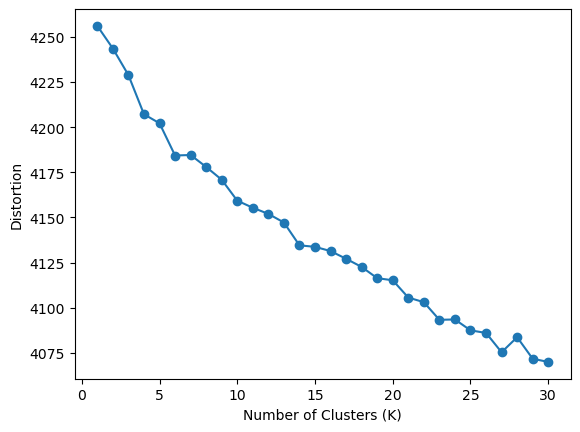

In [ ]:
inertia = list()

#inertia 측정: 각 클러스터와 해당 클러스터의 중심과의 거리의 제곱합. 클러스터의 응집도. inertia가 작을수록 좋음.
for i in range(1,31):
    model = KMeans(n_clusters=i)
    model.fit(vector_2nd)
    inertia.append(model.inertia_)

# K수에 따라 inertia의 변화
plt.plot(range(1,31), inertia, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()


/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

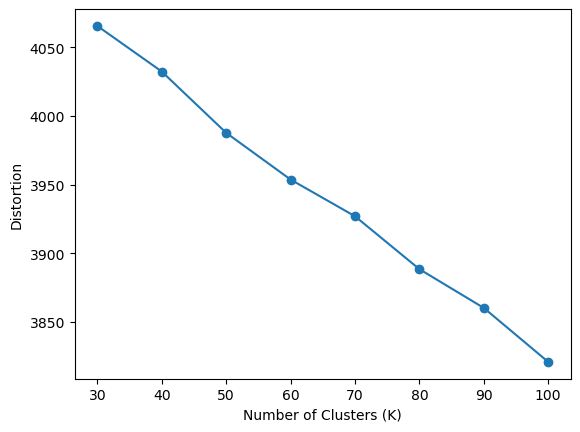

In [ ]:
inertia = list()
# 30~100까지 10 단위로
#inertia 측정: 각 클러스터와 해당 클러스터의 중심과의 거리의 제곱합. 클러스터의 응집도. inertia가 작을수록 좋음.
range = range(30,101,10)
for i in range:
    model = KMeans(n_clusters=i)
    model.fit(vector_2nd)
    inertia.append(model.inertia_)

# K수에 따라 inertia의 변화
plt.plot(range, inertia, '-o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

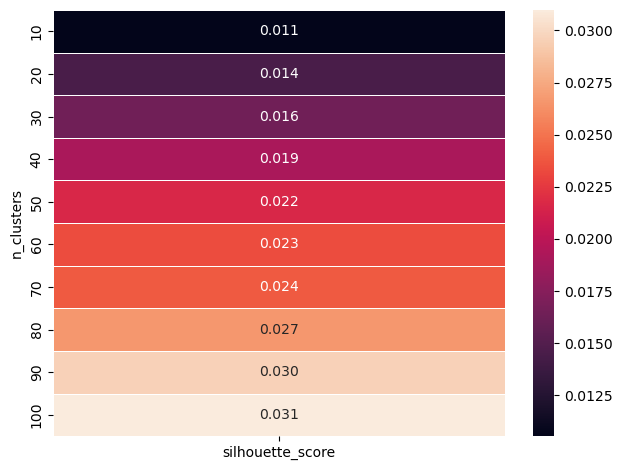

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(10,101,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(vector_2nd) # 가장 높은 실루엣 계수와 매핑되는 k

In [ ]:
model = KMeans(n_clusters=200)
cluster_labels = model.fit_predict(vector_2nd)
silhouette_avg = silhouette_score(vector_2nd, cluster_labels)
print(silhouette_avg)

/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.05318673603110476


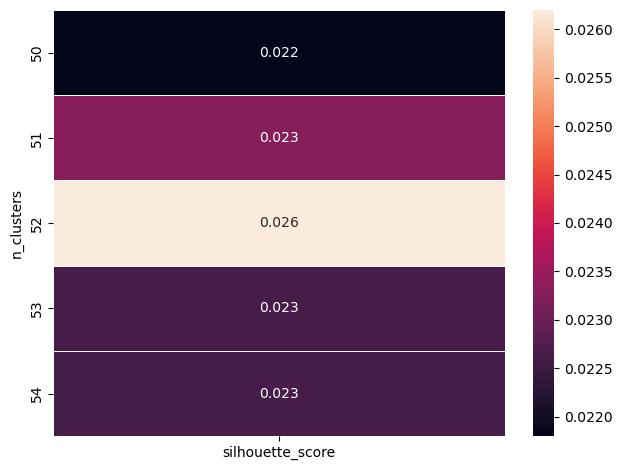

In [ ]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(50,55)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(data=vector_2nd)

In [ ]:
cluster1_result.head()

,cluster_num,count,top_title,top_text,summary
0,0,1,"로봇진흥원, 5G기반 첨단제조로봇 실증 기술교류회 개최",['(지디넷코리아=신영빈 기자)한국로봇산업진흥원은\xa021일 대구 본원에서 5G ...,행사는진흥원과 장비 구축기업 13곳이참여해▲5G기반 첨단 제조로봇 실증 서비스 분야...
1,1,1,‘세계 4위’ 부자 다음주 10년 만에 한국 온다…尹대통령·이재용 만날 듯,"['', '21일 IT 업계에 따르면, 저커버그 CEO는 아시아·태평양 순회 방문의...",21일뉴스 업계에 따르면 저커버그 CEO는 아시아·태평양 순회 방문의 하나로 내주 ...
2,2,3,"무하유, AI 영상분석 전문가 이광주 CTO 영입","['', ""인공지능(AI) 표절검사 서비스 '카피킬러' 운영사 무하유는 신임 최고개...",인공지능(AI) 표절검사 서비스 카피킬러 운영사 무하유는 신임 최고개발책임자(CTO...
3,3,1,"로보락, 지난해 국내 청소가전 매출 2천억원",['(지디넷코리아=신영빈 기자)청소가전 전문기업 로보락은\xa0지난해 국내 매출액이...,청소가전 전문기업 로보락은지난해 국내 매출액이 전년 대비 2배성장한2천억 원을 기록...
4,4,1,"""1주에 최대 10개 의결권""···복수의결권주식 발행 1호 기업 탄생",['(지디넷코리아=방은주 기자)복수의결권주식 발행 1호 기업이 탄생했다. 작년 11...,복수의결권주식이란 1주당 최대 10개의 의결권을 부여하는 주식으로 벤처기업이 지분 ...


In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans

result_2nd = KMeans(n_clusters=100).fit_predict(vector_2nd)
cluster1_result['cluster2nd'] = result_2nd

#cluster2_result = print_cluster_result(train=cluster1_result, result=result_2nd, col_cluster="cluster2nd")

/Users/choejuhui/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def print_cluster2_result(train):
    clusters = []
    counts = []
    top_title = []
    top_noun = []
    top_abs = []
    for cluster_num in set(result_2nd):
        # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
        # if(cluster_num == -1 or cluster_num == 0):
        #     continue
        # else:
            print("cluster num : {}".format(cluster_num))
            temp_df = train[train['cluster2nd'] == cluster_num] # cluster num 별로 조회
            clusters.append(cluster_num)
            counts.append(len(temp_df))
            top_title.append(temp_df.reset_index()['top_title'][0])
            top_noun.append(temp_df.reset_index()['top_text'][0]) # 군집별 첫번째 기사를 대표기사로 ; tfidf방식
            top_abs.append(temp_df.reset_index()['summary'][0])
            for title in temp_df['top_title']:
                print(title) # 제목으로 살펴보자
            print()

    cluster_result = pd.DataFrame({'cluster_num':clusters, 'count':counts, 'top_title':top_title, 'top_text':top_noun, 'summary':top_abs})
    return cluster_result

In [ ]:
cluster2_result = print_cluster2_result(cluster1_result)

cluster num : 0
국정원, 국제 사이버훈련 종합 우승
韓·英 합동팀, 국제 사이버훈련 'DCM' 종합우승
BTS부터 뽀로로까지…2023 대한민국 우표컬렉션 판매
BTS부터 뽀로로까지…'2023 대한민국 우표컬렉션' 나온다
‘BTS·뽀통령’ 등 88종 우표 콜렉션…28일부터 판매
지난해 88종 우표 한 번에 모아볼까…대한민국 우표컬렉션 발간
“장학금 200만원 매달 준다”…尹대통령, 이공계 키우려 돈보따리 푼다
尹 "이공계 대학원생에 연구생활장학금 지급"…현장에선 "본질 벗어나"
이공계 대학원생에게 매달 최대 110만원 준다
정부, '스타이펜드' 도입…이공계 대학원생에 月 80~110만원 지급
석사 80만원·박사 110만원… 이공계 대학원생에 매월 생활비
R&D기반 창업 특화 '제2연구단지' 만든다
대학원생 '대통령 장학금' 신설···대덕 잇는 제2 연구단지 조성도
정부 R&D 참여 이공계 대학원생, 연구생활 장학금 받는다
대전 교촌지구에 ‘제2연구단지’ 조성…CTX-철도 지하화로 ‘과학수도’ 업그레이드
박사연구원 월 생계비 110만원 보장…생활장학금 도입
국가 R&D 참여 이공계 대학원생에 매달 장학금…학업·생계 모두 보장
윤 대통령 "이공계 학생 돈 걱정없이 연구하게 지원"
[속보] 윤 대통령 “이공계 대학원생에 연구장학금 도입…대통령장학생도 확대”

cluster num : 1
SK텔레콤, 日 NTT도코모와 ‘가상화 기지국 기술 백서’ 공동 발간
SKT, NTT도코모와 가상화 기지국 기술백서 발간
6G 진화 등 핵심요소 `콕콕` 집었다... SKT·NTT도코모, `기술백서` 발간
SK텔레콤, NTT도코모와 가상화 기지국 기술 백서 발간
SKT-NTT도코모, 가상화 기지국 기술백서 공동 발간
SKT, 日 NTT도코모와 6G 진화 위한 '가상화 기지국' 백서 발간
SKT, NTT도코모와 vRAN 기술백서 공동 발간
SKT-NTT 도코모,  6G 도약에 필요한 '가상화 기지국' 기술 협력
SKT, 日 NTT도코모와 가상화 기지국 백서 공동 발간
LG유

In [ ]:
cluster1_result.head()

,cluster_num,count,top_title,top_text,summary,cluster2nd
0,0,1,"로봇진흥원, 5G기반 첨단제조로봇 실증 기술교류회 개최",['(지디넷코리아=신영빈 기자)한국로봇산업진흥원은\xa021일 대구 본원에서 5G ...,행사는진흥원과 장비 구축기업 13곳이참여해▲5G기반 첨단 제조로봇 실증 서비스 분야...,67
1,1,1,‘세계 4위’ 부자 다음주 10년 만에 한국 온다…尹대통령·이재용 만날 듯,"['', '21일 IT 업계에 따르면, 저커버그 CEO는 아시아·태평양 순회 방문의...",21일뉴스 업계에 따르면 저커버그 CEO는 아시아·태평양 순회 방문의 하나로 내주 ...,72
2,2,3,"무하유, AI 영상분석 전문가 이광주 CTO 영입","['', ""인공지능(AI) 표절검사 서비스 '카피킬러' 운영사 무하유는 신임 최고개...",인공지능(AI) 표절검사 서비스 카피킬러 운영사 무하유는 신임 최고개발책임자(CTO...,9
3,3,1,"로보락, 지난해 국내 청소가전 매출 2천억원",['(지디넷코리아=신영빈 기자)청소가전 전문기업 로보락은\xa0지난해 국내 매출액이...,청소가전 전문기업 로보락은지난해 국내 매출액이 전년 대비 2배성장한2천억 원을 기록...,38
4,4,1,"""1주에 최대 10개 의결권""···복수의결권주식 발행 1호 기업 탄생",['(지디넷코리아=방은주 기자)복수의결권주식 발행 1호 기업이 탄생했다. 작년 11...,복수의결권주식이란 1주당 최대 10개의 의결권을 부여하는 주식으로 벤처기업이 지분 ...,19


# 키워드 추출 - KeyBERT

In [38]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 2.7 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.4-py3-none-any.whl size=39199 sha256=6572ee3c789f22b3d2805fc45c8a5afbeb06ac05bbc63c87b2975e0cb17a0387
  Stored in directory: /root/.cache/pip/wheels/97/ef/4c/6588bd7072b0cc04225b40e639b991e49ebd4e21fb81f0acee
Successfully built keybert


In [39]:
from keybert import KeyBERT

In [40]:
key_model = KeyBERT('paraphrase-multilingual-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [58]:
with open('/content/drive/MyDrive/KUBIG/2024 winter basic study(NLP)/stopword.txt')as fin:
  stopwords = fin.readlines()
  for i in range(len(stopwords)):
    stopwords[i] = stopwords[i].replace('\n','')
print(stopwords)

['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에

In [78]:
new_stopwords = stopwords + ['이디야커피','블루','넘어', '선봬', '한국', '尹대통령','가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이']

In [134]:
def keyword(data, col_cluster):
    result = []
    for i in range(len(data)):
        key_text = cluster1_result[cluster1_result[col_cluster]==i]['top_title']
        key_text = ' '.join(key_text)
        keyword = key_model.extract_keywords(key_text, keyphrase_ngram_range=(1,2),
                                             use_mmr=True, stop_words=new_stopwords, top_n=1, diversity=0.2)
        result.append(keyword[0][0])
    return result

def merge_keyword(data, col_cluster): #새 열로 추가.
    data_temp = data.copy()
    data_temp['keyword'] = keyword(data, col_cluster)
    return data_temp

keyword_result = merge_keyword(cluster2_result, col_cluster='cluster2nd')

keyword_df = keyword_result[['cluster_num', 'count', 'keyword']]
keyword_df.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)

# 가장 많은 카운트를 차지한 군집은 연관성 없는 기사들이 한꺼번에 모인 군집. 제거하는 것이 맞다고 판단.
keyword_df.drop(index=[0], inplace=True)

# 군집 내 기사가 5개 이상인 것들만 추출
keyword_df = keyword_df[keyword_df['count']>5]

#
lst = []
for i in keyword_df['keyword']:
  lst.append(i.upper())
keyword_df['keyword'] = lst
keyword_df


<ipython-input-134-19c8c3357549>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_df.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)
<ipython-input-134-19c8c3357549>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_df.drop(index=[0], inplace=True)


,cluster_num,count,keyword
1,30,150,기업에 우주발사체
2,94,136,게임 데이터
3,63,132,대전 스마트
4,31,117,신작 출시
5,29,116,블루아카이브 이디야
...,...,...,...
94,82,8,갤24 가격
95,81,8,정보보호 인적자원개발위원회
96,45,7,인간형로봇 연금술사
97,67,7,로봇진흥원 5G기반


In [135]:
# 제목에서 키워드 추출
keyword_df.sort_values(by='cluster_num')

,cluster_num,count,keyword
70,0,19,AI융합연구센터 발족
66,1,20,도룡벤처포럼 목표는
17,2,60,다큐브 AI업무비서
14,3,64,과학 과학은
53,4,27,뉴럴링크칩 이식
...,...,...,...
2,94,136,게임 데이터
93,96,9,위메이드 37게임즈
81,97,12,AI 정상회의
98,98,7,인사 보건복지부


In [132]:
# 요약문에서 키워드 추출
keyword_df.sort_values(by='cluster_num')

,cluster_num,count,keyword
70,0,19,공시했다 투자
66,1,20,도룡벤처포럼이
17,2,60,호텔 로봇
14,3,64,반응적 공격성은
53,4,27,주요병원 전공의들이
...,...,...,...
2,94,136,게임 데이터를
93,96,9,37게임즈와 미르4중국
81,97,12,AI의 안전성
98,98,7,기자 산업통상자원통상자원부


In [117]:
final = pd.merge(cluster1_result, keyword_df, how='left', left_on='cluster2nd', right_on='cluster_num')
final.drop(['cluster_num_x', 'count_x', "cluster_num_y", 'count_y'],axis=1, inplace=True)
final.head()

,top_title,top_text,summary,cluster2nd,keyword
0,"아프리카TV 작년 사상 최대 실적…""5월까지 '숲' 출시""(종합2보)","['', ""(서울=연합뉴스) 최현석 기자 = 아프리카TV가 작년 사상 최대 매출과 ...",아프리카TV 관계자는 아프리카TV가 작년 사상 최대 매출과 영업이익을 올렸다. 올해...,0,AI융합연구센터 발족
1,"과기정통부, 해외 연구기관 허브 구축 사업 접수 시작",[' [이데일리 강민구 기자] 과학기술정보통신부가 글로벌 연구개발(R&D)을 지원하...,과학기술정보통신부가 글로벌 연구개발(R&D)을 지원하기 위해 ‘해외우수연구기관 협력...,0,AI융합연구센터 발족
2,대덕특구 거점대 '창업 노하우' 공유한다…'스타트업 데모데이',"['', ""연구개발특구진흥재단(특구재단)이 대덕연구개발특구 거점 대학과 함께 예비창...",연구개발특구진흥재단(특구재단)이 대덕연구개발특구 거점 대학과 함께 예비창업자에게 기...,0,AI융합연구센터 발족
3,'AI'에 진심인 한글과컴퓨터…임직원들 한 자리에 모인 이유는,['(지디넷코리아=김미정 기자)한글과컴퓨터(대표 변성준·김연수) 임직원들이 인공지능...,한글과컴퓨터(대표 변성준·김연수) 임직원들이 인공지능(AI) 사업 주도권 확보를 위...,0,AI융합연구센터 발족
4,단역 배우 일자리 위협하는 AI,"['', '미국 할리우드의 대표 연예 에이전시(기획사) WME는 지난달 테크 기업 ...",미국 할리우드의 대표 연예 에이전시(기획사) WME는 지난달 테크 기업 버밀리오와 ...,0,AI융합연구센터 발족


In [122]:
keyword_df[keyword_df['cluster_num'] == 95]

,cluster_num,count,keyword


In [123]:
final.dropna(inplace=True)

In [125]:
final.to_csv('final_keyword_title_summary.csv')